In [0]:
"""
Created on Fri Apr 24 17:11:35 2020
https://blog.aloni.org/posts/backprop-with-tensorflow/
@author: user
"""

import tensorflow as tf
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset


##Team

1. Okafor Chigozie Kenneth 225983
2. Md Khamar Uz Zama 226267
3. Rajatha Nagaraja Rao 223758

##Weights initialization: 

If all the weights are initialized with 0, the derivative with respect to loss function is the same for every w in W vector, thus all weights have the same value in subsequent iterations. This makes hidden units symmetric and continues for all the n iterations. Also, the weights initialized must not be too high to avoid exploding gradients where large error gradients lead to large updates to the neural network weights. Too low weights lead to vanishing gradients where neural network weights are not updated.

The weights were initialiazed to center at zero with standard deviation of 0.1. 

##Effect of number of hidden layers:
Adding hidden layers may or may not increase the accuracy of the model as it depends on the complexity of the problem to be solved. If there are too many hidden layers it will increase the accuracy on the training set but leads to overfitting on the training set hence losing its capacity to generalise on the test set. Model complexity must be appropriate to learn the pattern in the data and to generalise on the test data. Hidden layers are required when data cannot be separated linearly (linear decision boundaries). A single layer of neurons forms a linear decision plane with the following equation y = w_1*x_1 + w_2*x_2 + ⋯ + w_i*x_i + b

The deeper we went, the more overfitting we experienced. 

##Accuracy
The inital accuracy on training the model with 6 layers and using relu activation function with the following dimensions [784, 512], [512, 256], [256, 128], [128, 64], [64, 32], [32, self.nclasses] led to an accuracy of 62%


##Epochs and Batches
Depeer neworks required more epochs to converge, with higher accuracies, but sharp decline the accuracy on the test data.

Epoch size between 64 and 512 did not affect the training process or accuracy of the model.  

#Data Inspection of the Minst Dataset

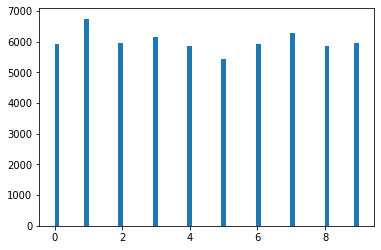

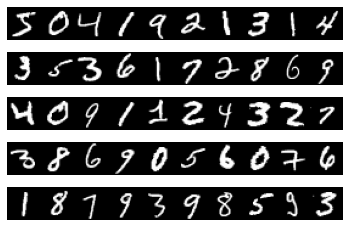

In [0]:
#Loading and Spliting the Dataset with Google API
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Change Batch_size
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                  test_images.reshape([-1, 784]), test_labels,
                  batch_size=1024)


# Make a histogram with 62 bins of the training labels data to see the distribution
plt.hist(train_labels, 62)

# Show the plot
plt.show()

for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis('off')
    plt.imshow(train_images[i], cmap="gray")
    plt.subplots_adjust(wspace=0.01)
    
plt.show()


#Data Inspection of the FashionMinst Dataset

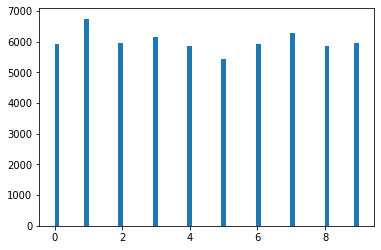

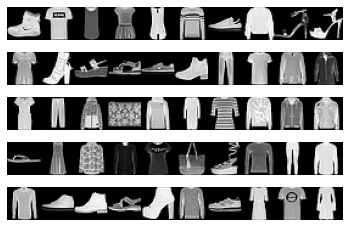

In [0]:
#Loading and Spliting the Dataset with Google API
mnistFashion = tf.keras.datasets.fashion_mnist
(train_img_mnistFashion, train_label_mnistFashion), (test_img_mnistFashion, test_label_mnistFashion)  = mnistFashion.load_data()

# Change Batch_size
data2 = MNISTDataset(train_img_mnistFashion.reshape([-1, 784]), train_label_mnistFashion, 
                    test_img_mnistFashion.reshape([-1, 784]), test_label_mnistFashion,
                    batch_size=128) 


# Make a histogram with 62 bins of the training labels data to see the distribution
plt.hist(train_labels, 62)
# Show the plot
plt.show()

for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis('off')
    plt.imshow(train_img_mnistFashion[i], cmap="gray")
    plt.subplots_adjust(wspace=0.01)
    
plt.show()

In [0]:
def experimentOne():
    training_steps = 1000
    lr = 0.05
    # w1 = tf.Variable(tf.random.truncated_normal((784, 10) ,stddev=0.1), trainable=True, dtype=tf.float32)
    # b1 = tf.Variable(tf.random.truncated_normal((1, 10),stddev=0.1), trainable=True, dtype=tf.float32)
    W1 = tf.Variable(np.random.rand(784, 10), dtype= tf.float32)
    b1 = tf.Variable(np.random.rand(1, 10), dtype= tf.float32)
    train_stats = {}
    train_stats["acc"] = []
    train_stats["steps"] = []
    train_stats["loss"] = []
    for step in range(training_steps):
        img_batch, lbl_batch = data.next_batch()
        with tf.GradientTape() as tape:
            logits = tf.matmul(img_batch, W1) + b1
            error = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = lbl_batch, logits = logits))
  
        grads1 = tape.gradient(error, [W1, b1])
        W1.assign_sub(lr * grads1[0])
        b1.assign_sub(lr * grads1[1])

        if(step % 100 == 0):
            preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
            accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
            print("Loss: {} and Accuracy: {}".format(error, accuracy))
            train_stats["acc"].append(accuracy.numpy())
            train_stats["steps"].append(step)  
            train_stats["loss"].append(error.numpy())
    test_preds = tf.argmax(tf.matmul(data.test_data, W1) + b1, axis=1,output_type=tf.int32)
    acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),tf.float32))
    print(acc)
    return train_stats, test_preds, W1, b1

In [0]:
def experimentTwo():
#  Added another layer with Relu activation
    train_steps = 1000
    learning_rate = 0.05
    train_stats = {}
    train_stats["acc"] = []
    train_stats["steps"] = []
    train_stats["loss"] = []
    W1 = tf.Variable(np.random.rand(784, 100), dtype= tf.float32)
    b1 = tf.Variable(np.random.rand(1, 100), dtype= tf.float32)
    W2 = tf.Variable(np.random.rand(100, 10) , dtype= tf.float32)
    b2 = tf.Variable(np.random.rand(1, 10), dtype= tf.float32)
    
    
    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        
        with tf.GradientTape() as tape:

            z1 = tf.add(tf.matmul(img_batch, W1), b1)
            a1 = tf.nn.relu(z1)
            
            # Do not change the activation for the last layer
            logits = tf.add(tf.matmul(a1, W2), b2)
            # a2 = tf.nn.softmax(logits)
            error = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))
    
        grads = tape.gradient(error, [W1, b1, W2, b2])
        W1.assign_sub(learning_rate * grads[0])
        b1.assign_sub(learning_rate * grads[1])
        W2.assign_sub(learning_rate * grads[2])
        b2.assign_sub(learning_rate * grads[3])
            
        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                                 tf.float32))
            print("Loss: {} Accuracy: {}".format(error, accuracy))
            train_stats["acc"].append(accuracy.numpy())
            train_stats["steps"].append(step)  
            train_stats["loss"].append(error.numpy())
    
    z1_test = tf.matmul(data.test_data, W1) + b1
    a1_test = tf.nn.relu(z1_test)

    logits_test = tf.matmul(a1_test, W2) + b2
    test_preds = tf.argmax(logits_test, axis=1,output_type=tf.int32)
    acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),tf.float32))
    print("Test accuracy: " + str(acc))
    
    predBools = tf.equal(test_preds, data.test_labels).numpy()
    incorrectImages = np.array(data.test_data[np.argwhere(predBools == False)])
    incorrectLabels = np.array(test_preds.numpy()[np.argwhere(predBools == False)])

    
    return train_stats, test_preds, incorrectImages, incorrectLabels, W1, b1, W2, b2

In [0]:
def experimentThree():
# Added three layers and increased the train_steps to 5000
    train_steps = 5000
    learning_rate = 0.01
    train_stats = {}
    train_stats["acc"] = []
    train_stats["steps"] = []
    train_stats["loss"] = []
    
    W1 = tf.Variable(np.random.rand(784, 200), dtype= tf.float32)
    b1 = tf.Variable(np.random.rand(1, 200), dtype= tf.float32)
    W2 = tf.Variable(np.random.rand(200, 50) , dtype= tf.float32)
    b2 = tf.Variable(np.random.rand(1, 50), dtype= tf.float32)
    W3 = tf.Variable(np.random.rand(50, 10) , dtype= tf.float32)
    b3 = tf.Variable(np.random.rand(1, 10), dtype= tf.float32)    
    
    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        
        with tf.GradientTape() as tape:

            z1 = tf.add(tf.matmul(img_batch, W1), b1)
            a1 = tf.nn.relu(z1)

            z2 = tf.add(tf.matmul(a1, W2), b2)
            a2 = tf.nn.relu(z2)

            # Do not change the activation for the last layer
            logits = tf.add(tf.matmul(a2, W3), b3)
            # a3 = tf.nn.softmax(logits)
            error = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))
    
        grads = tape.gradient(error, [W1, b1, W2, b2, W3, b3])
        W1.assign_sub(learning_rate * grads[0])
        b1.assign_sub(learning_rate * grads[1])
        W2.assign_sub(learning_rate * grads[2])
        b2.assign_sub(learning_rate * grads[3])
        W3.assign_sub(learning_rate * grads[4])
        b3.assign_sub(learning_rate * grads[5])        
            
        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                                 tf.float32))
            print("Loss: {} Accuracy: {}".format(error, accuracy))
            train_stats["acc"].append(accuracy.numpy())
            train_stats["steps"].append(step)  
            train_stats["loss"].append(error.numpy())            
    
    z1_test = tf.matmul(data.test_data, W1) + b1
    a1_test = tf.nn.relu(z1_test)

    z2_test = tf.matmul(a1_test, W2) + b2
    a2_test = tf.nn.relu(z2_test)
    
    logits_test = tf.matmul(a2_test, W3) + b3
    test_preds = tf.argmax(logits_test, axis=1,output_type=tf.int32)
    acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),tf.float32))
    print("Test accuracy: " + str(acc))
    
    
    return train_stats, test_preds, W1, b1, W2, b2, W3, b3

In [0]:
def experimentFour():
  # A two layer network  but the tensors are initialized to constant
    train_steps = 1000
    learning_rate = 0.05
    train_stats = {}
    train_stats["acc"] = []
    train_stats["steps"] = []
    train_stats["loss"] = []
    W1 = tf.Variable(np.random.rand(784, 100)*0, dtype= tf.float32)
    b1 = tf.Variable(np.random.rand(1, 100)*0, dtype= tf.float32)
    W2 = tf.Variable(np.random.rand(100, 10)*0, dtype= tf.float32)
    b2 = tf.Variable(np.random.rand(1, 10)*0, dtype= tf.float32)

    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        
        with tf.GradientTape() as tape:

            z1 = tf.add(tf.matmul(img_batch, W1), b1)
            a1 = tf.nn.relu(z1)
            
            # Do not change the activation for the last layer
            logits = tf.add(tf.matmul(a1, W2), b2)
            # a2 = tf.nn.softmax(logits)
            error = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))
    
        grads = tape.gradient(error, [W1, b1, W2, b2])
        W1.assign_sub(learning_rate * grads[0])
        b1.assign_sub(learning_rate * grads[1])
        W2.assign_sub(learning_rate * grads[2])
        b2.assign_sub(learning_rate * grads[3])
            
        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                                 tf.float32))
            print("Loss: {} Accuracy: {}".format(error, accuracy))
            train_stats["acc"].append(accuracy.numpy())
            train_stats["steps"].append(step)  
            train_stats["loss"].append(error.numpy())
    
    z1_test = tf.matmul(data.test_data, W1) + b1
    a1_test = tf.nn.relu(z1_test)

    logits_test = tf.matmul(a1_test, W2) + b2
    test_preds1 = tf.argmax(logits_test, axis=1,output_type=tf.int32)
    acc = tf.reduce_mean(tf.cast(tf.equal(test_preds1, data.test_labels),tf.float32))
    print("Test accuracy: " + str(acc))
    
    
    return train_stats, test_preds, W1, b1, W2, b2

Loss: 5.2212371826171875 and Accuracy: 0.103515625
Starting new epoch...
Loss: 1.2269850969314575 and Accuracy: 0.5947265625
Starting new epoch...
Starting new epoch...
Loss: 0.8246453404426575 and Accuracy: 0.7353515625
Starting new epoch...
Starting new epoch...
Loss: 0.7145552635192871 and Accuracy: 0.763671875
Starting new epoch...
Loss: 0.6783537864685059 and Accuracy: 0.7900390625
Starting new epoch...
Starting new epoch...
Loss: 0.5552847385406494 and Accuracy: 0.8251953125
Starting new epoch...
Starting new epoch...
Loss: 0.5452617406845093 and Accuracy: 0.8271484375
Starting new epoch...
Loss: 0.556565523147583 and Accuracy: 0.826171875
Starting new epoch...
Starting new epoch...
Loss: 0.5075425505638123 and Accuracy: 0.841796875
Starting new epoch...
Starting new epoch...
Loss: 0.4939529001712799 and Accuracy: 0.8525390625
Starting new epoch...
tf.Tensor(0.8632, shape=(), dtype=float32)


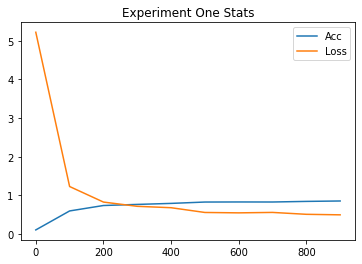

<Figure size 432x288 with 0 Axes>

In [0]:
train_stats1, test_preds1, W1, b1 = experimentOne()
#    %matplotlib inline in notebook
plt.plot(train_stats1["steps"], train_stats1["acc"], label='Acc')
plt.plot(train_stats1["steps"], train_stats1["loss"], label='Loss')
plt.title("Experiment One Stats")
plt.legend()
plt.show()
plt.clf()

#Test  Model one

In [0]:

test_preds = tf.argmax(tf.matmul(data1.test_data, W1) + b1, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data1.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.8632, shape=(), dtype=float32)


#Visualization of experiment One accuracy with test data

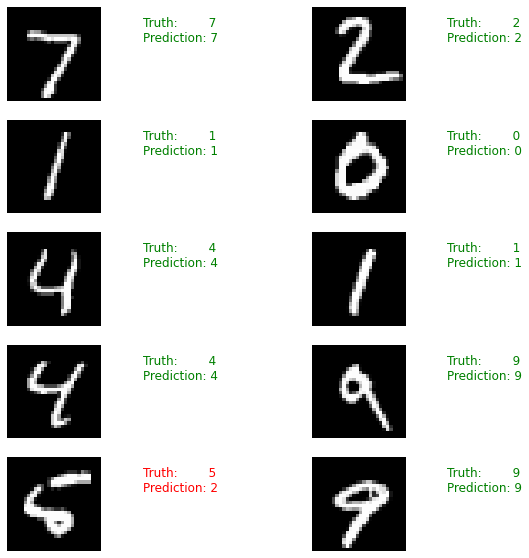

In [0]:

number_of_image_to_visualize = 10
image_data= []
label_data = []
pred_label = []
# x = [randint(0, 9) for p in range(0, len(data1.test_data))]

# rand = np.random.randint(0, len(test_preds1))


for i in range(10):
  if len(image_data) != number_of_image_to_visualize:
    image_data.append(test_images[i])
    label_data.append(data.test_labels[i])
    pred_label.append(test_preds1[i])
   

fig = plt.figure(figsize=(10, 10))
for i in range(10):
    truth = label_data[i]
    prediction = pred_label[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(test_images[i],  cmap="gray")

Loss: 186.6612091064453 Accuracy: 0.099609375
Starting new epoch...
Starting new epoch...
Loss: 4.342247009277344 Accuracy: 0.755859375
Starting new epoch...
Starting new epoch...
Loss: 1.4422551393508911 Accuracy: 0.8544921875
Starting new epoch...
Starting new epoch...
Loss: 1.810903787612915 Accuracy: 0.8271484375
Starting new epoch...
Loss: 1.0598599910736084 Accuracy: 0.8837890625
Starting new epoch...
Starting new epoch...
Loss: 1.2669817209243774 Accuracy: 0.8740234375
Starting new epoch...
Starting new epoch...
Loss: 1.1751289367675781 Accuracy: 0.87109375
Starting new epoch...
Loss: 1.9810028076171875 Accuracy: 0.828125
Starting new epoch...
Starting new epoch...
Loss: 0.8029485940933228 Accuracy: 0.890625
Starting new epoch...
Starting new epoch...
Loss: 1.2118749618530273 Accuracy: 0.861328125
Starting new epoch...
Test accuracy: tf.Tensor(0.8813, shape=(), dtype=float32)


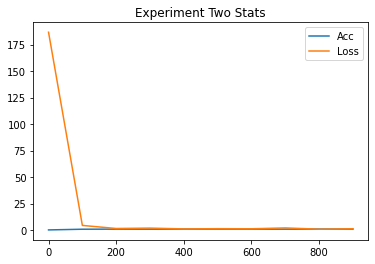

<Figure size 432x288 with 0 Axes>

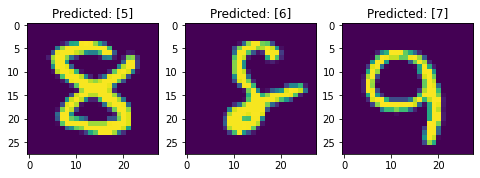

In [0]:
train_stats2, test_preds2, incorrectImages,incorrectLabels, m2W1, m2b1, m2W2, m2b2  = experimentTwo()
plt.plot(train_stats2["steps"], train_stats2["acc"], label='Acc')
plt.plot(train_stats2["steps"], train_stats2["loss"], label='Loss')
plt.title("Experiment Two Stats")
plt.legend()
plt.show()
plt.clf()
 
columns = 3
rows = 1
fig=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    rand = np.random.randint(0,incorrectImages.shape[0])
    img = incorrectImages[rand]
    label = incorrectLabels[rand]
    img=img.reshape(28,28)    
    plt.imshow(img)
    title = "Predicted: " + str(label)
    plt.title(title)

plt.show()



# Test Accuracy for model 3

In [0]:
x = tf.matmul(data1.test_data, m2W1) + m2b1
x = tf.nn.relu(x)
test_preds = tf.argmax(tf.matmul(x, m2W2) + m2b2, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data1.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.8813, shape=(), dtype=float32)


#Visualization of experiment Two accuracy with test data

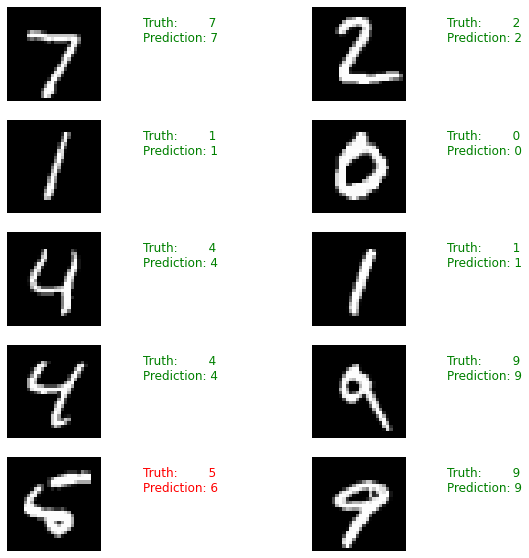

In [0]:

number_of_image_to_visualize = 10
image_data= []
label_data = []
pred_label = []
# x = [randint(0, 9) for p in range(0, len(data1.test_data))]

for i in range(10):
  if len(image_data) != number_of_image_to_visualize:
    image_data.append(test_images[i])
    label_data.append(data.test_labels[i])
    pred_label.append(test_preds2[i])
   

fig = plt.figure(figsize=(10, 10))
for i in range(10):
    truth = label_data[i]
    prediction = pred_label[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(test_images[i],  cmap="gray")

Loss: 10468.92578125 Accuracy: 0.095703125
Starting new epoch...
Starting new epoch...
Loss: 2.3459622859954834 Accuracy: 0.0947265625
Starting new epoch...
Starting new epoch...
Loss: 2.34414005279541 Accuracy: 0.091796875
Starting new epoch...
Starting new epoch...
Loss: 2.3336899280548096 Accuracy: 0.10855263471603394
Starting new epoch...
Loss: 2.331712245941162 Accuracy: 0.1025390625
Starting new epoch...
Starting new epoch...
Loss: 2.317929744720459 Accuracy: 0.0966796875
Starting new epoch...
Starting new epoch...
Loss: 2.312507152557373 Accuracy: 0.11328125
Starting new epoch...
Loss: 2.3188490867614746 Accuracy: 0.09765625
Starting new epoch...
Starting new epoch...
Loss: 2.311678171157837 Accuracy: 0.1025390625
Starting new epoch...
Starting new epoch...
Loss: 2.3055648803710938 Accuracy: 0.1171875
Starting new epoch...
Loss: 2.3056581020355225 Accuracy: 0.091796875
Starting new epoch...
Starting new epoch...
Loss: 2.311861276626587 Accuracy: 0.0859375
Starting new epoch...
S

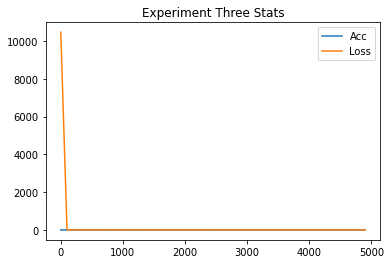

<Figure size 432x288 with 0 Axes>

In [0]:
train_stats3 , test_preds3, W1, b1, W2, b2, W3, b3= experimentThree()
plt.plot(train_stats3["steps"], train_stats3["acc"], label='Acc')
plt.plot(train_stats3["steps"], train_stats3["loss"], label='Loss')
plt.title("Experiment Three Stats")
plt.legend()
plt.show()  
plt.clf()



#Visualization of experiment Three accuracy with test data

In [0]:
x = tf.matmul(data1.test_data, W1) + b1
x = tf.nn.relu(x)
x = tf.matmul(x, W2) + b2
x = tf.nn.relu(x)
test_preds = tf.argmax(tf.matmul(x, W3) + b3, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data1.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.1135, shape=(), dtype=float32)


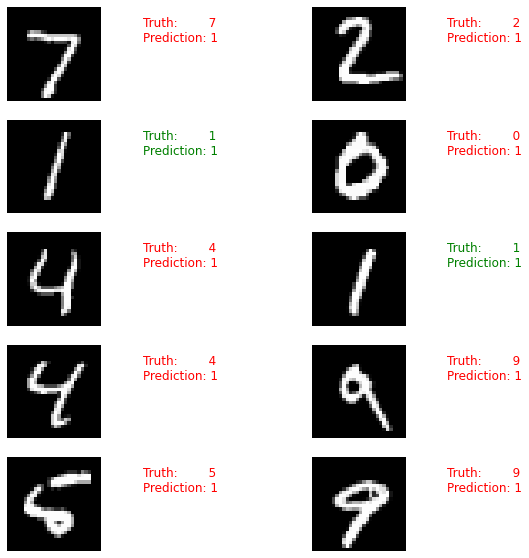

In [0]:

number_of_image_to_visualize = 10
image_data= []
label_data = []
pred_label = []
x = [randint(0, 9) for p in range(0, len(data1.test_data))]

for i in range(10):
  if len(image_data) != number_of_image_to_visualize:
    image_data.append(test_images[i])
    label_data.append(data.test_labels[i])
    pred_label.append(test_preds3[i])
   

fig = plt.figure(figsize=(10, 10))
for i in range(10):
    truth = label_data[i]
    prediction = pred_label[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(test_images[i],  cmap="gray")

Loss: 2.3025853633880615 Accuracy: 0.078125
Loss: 2.3015012741088867 Accuracy: 0.1171875
Loss: 2.3077640533447266 Accuracy: 0.0546875
Starting new epoch...
Loss: 2.296339988708496 Accuracy: 0.1328125
Loss: 2.306321144104004 Accuracy: 0.09375
Loss: 2.301572561264038 Accuracy: 0.109375
Loss: 2.305417537689209 Accuracy: 0.0703125
Loss: 2.301290988922119 Accuracy: 0.109375
Starting new epoch...
Loss: 2.3073983192443848 Accuracy: 0.0859375
Loss: 2.3090968132019043 Accuracy: 0.078125
Test accuracy: tf.Tensor(0.1135, shape=(), dtype=float32)


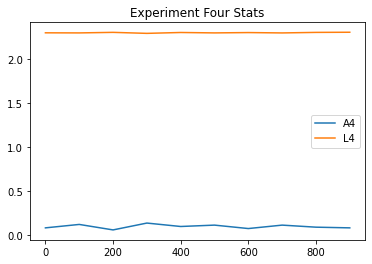

<Figure size 432x288 with 0 Axes>

In [0]:
train_stats4, test_preds4, vW1, vb1, vW2, vb2= experimentFour()
plt.plot(train_stats4["steps"], train_stats4["acc"], label='A4')
plt.plot(train_stats4["steps"], train_stats4["loss"], label='L4')
plt.title("Experiment Four Stats")
plt.legend()
plt.show()
plt.clf()

#Test Accuracy for Model 4

In [0]:
a2 = tf.add(tf.matmul(data1.test_data, vW1), vb1)
a2 = tf.nn.relu(a2)

test_preds = tf.argmax(tf.matmul(a2, vW2) + vb2, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data1.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.1135, shape=(), dtype=float32)


#Visualization of experiment Four accuracy with test data

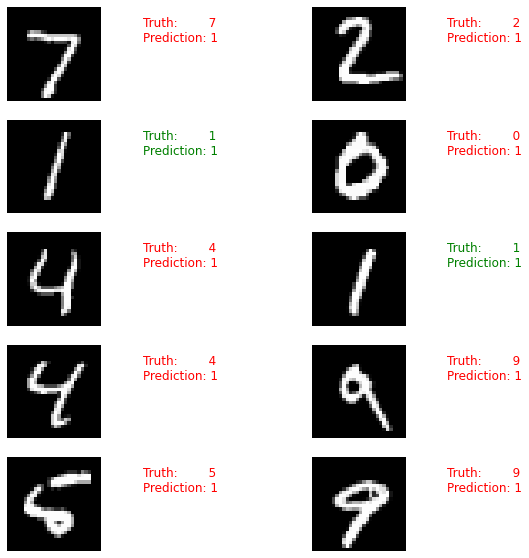

In [0]:

number_of_image_to_visualize = 10
image_data= []
label_data = []
pred_label = []
x = [randint(0, 9) for p in range(0, len(data1.test_data))]

for i in range(10):
  if len(image_data) != number_of_image_to_visualize:
    image_data.append(test_images[i])
    label_data.append(data.test_labels[i])
    pred_label.append(test_preds4[i])
   

fig = plt.figure(figsize=(10, 10))
for i in range(10):
    truth = label_data[i]
    prediction = pred_label[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(test_images[i],  cmap="gray")